In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py
from numpy.linalg import lstsq


In [2]:
eig_values = pickle.load(open('../eigen_values_all.pkl', 'rb'))
eig_vectors = pickle.load(open('../eigen_vectors_all.pkl', 'rb'))
modes = pickle.load(open('../evaluated_modes_all.pkl', 'rb'))

In [3]:
print(eig_vectors.shape)

(27556, 27556)


In [4]:
modes = np.asarray([mode.reshape(166,166) for mode in modes])

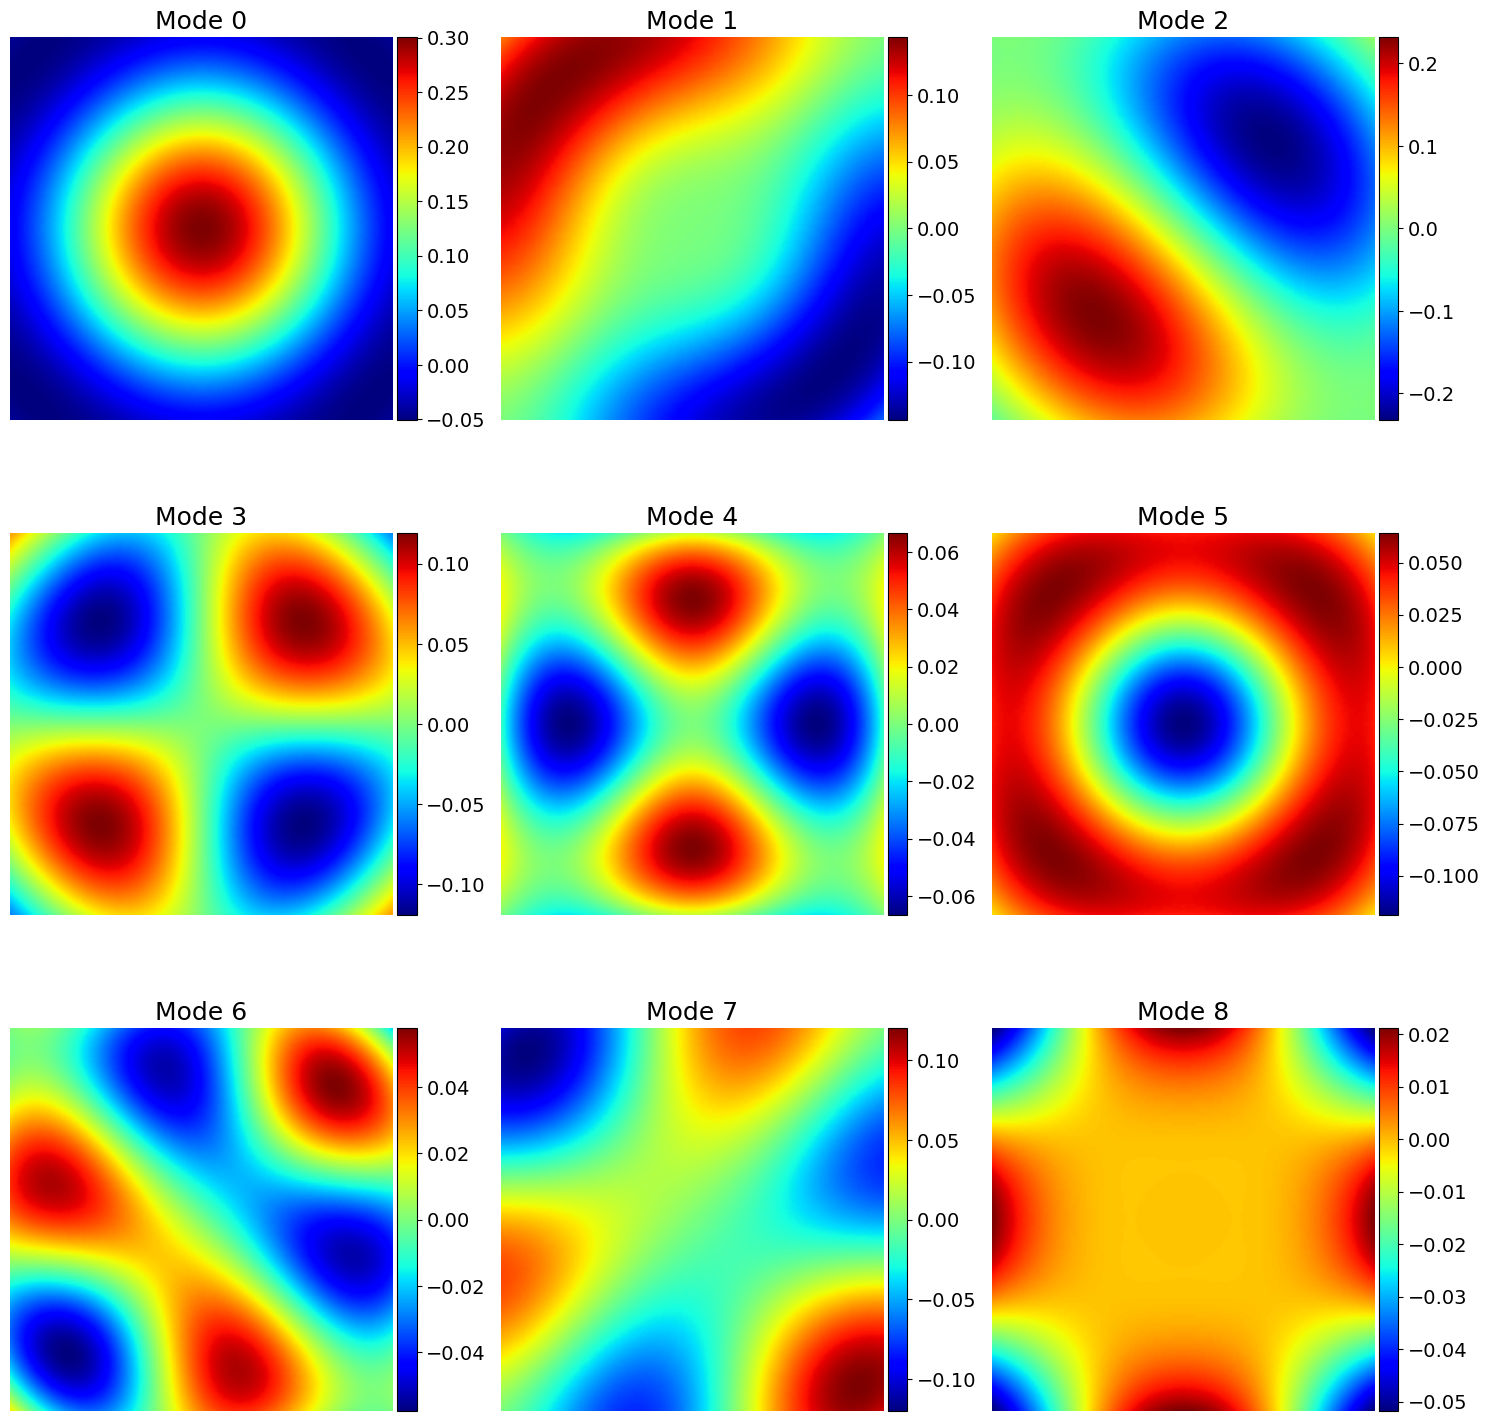

In [5]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i,mode in enumerate(modes[0:9]):
    im1 = ax[i//3][i%3].imshow(mode.real, cmap='jet')
    ax[i//3][i%3].set_title(f"Mode {i}", fontsize=18)
    ax[i//3][i%3].grid(False)
    ax[i//3][i%3].axis('off')
    divider = make_axes_locatable(ax[i//3][i%3])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=14)
    if i == 8:
        break
plt.tight_layout()
fig.savefig("plotted_modes.png", dpi=300)

In [6]:
meep_data = h5py.File('../../../data/meep-dataset-v2/0001/dft_00001.h5', 'r')

In [7]:
fields = meep_data['ey_2.r'][:] + 1j*meep_data['ey_2.i'][:]

In [8]:
field = fields[:,:,-1]
field = field.flatten()

In [9]:
reshaped_field = np.reshape(field, (166,166))
norm_factor = np.max(np.abs(reshaped_field))
reshaped_field = reshaped_field

min_real = np.min(reshaped_field.real)
max_real = np.max(reshaped_field.real)

min_imag = np.min(reshaped_field.imag)
max_imag = np.max(reshaped_field.imag)

min_abs = np.min(np.abs(reshaped_field))
max_abs = np.max(np.abs(reshaped_field))

min_phase = np.min(np.angle(reshaped_field))
max_phase = np.max(np.angle(reshaped_field))

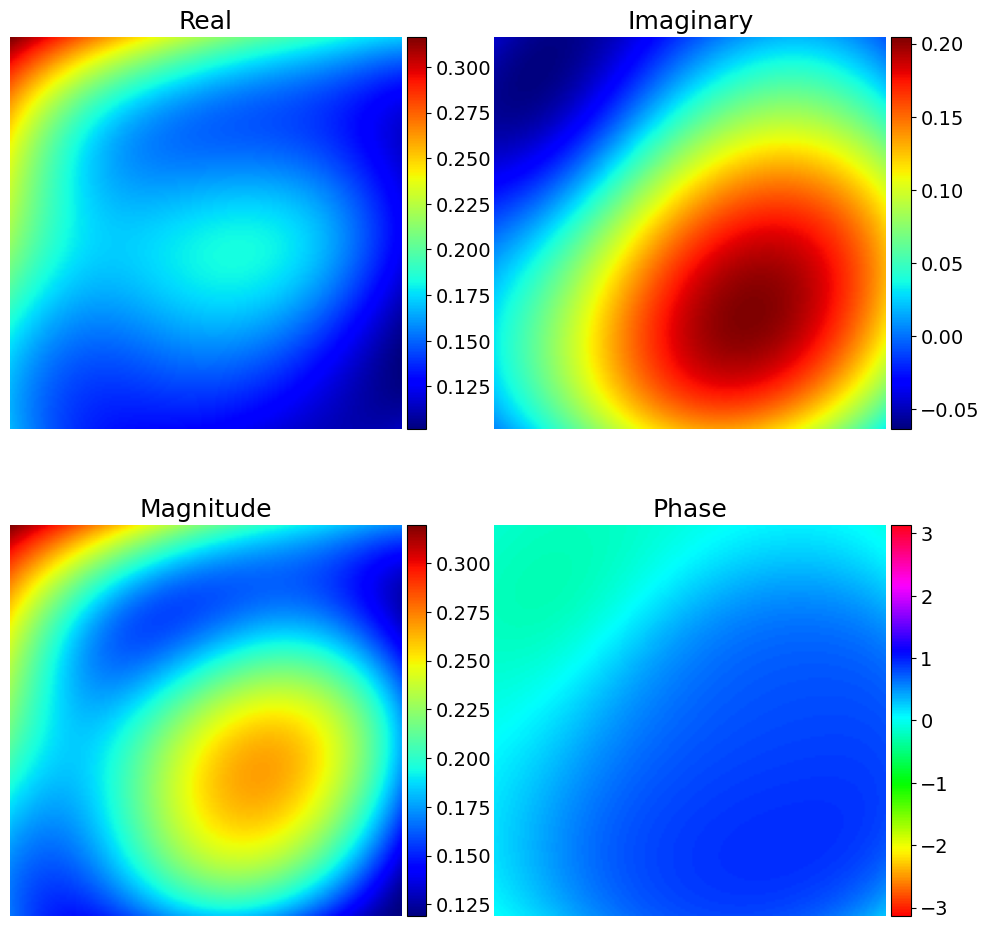

In [10]:
fig,ax = plt.subplots(2,2, figsize=(10,10))

im1 = ax[0][0].imshow(reshaped_field.real, cmap='jet', vmin=min_real, vmax=max_real)
divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

im1 = ax[0][1].imshow(reshaped_field.imag, cmap='jet', vmin=min_imag, vmax=max_imag)
divider = make_axes_locatable(ax[0][1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

im1 = ax[1][0].imshow(np.abs(reshaped_field), cmap='jet', vmin=min_abs, vmax=max_abs)
divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

im1 = ax[1][1].imshow(np.angle(reshaped_field), cmap='hsv', vmin=-np.pi, vmax=np.pi)
divider = make_axes_locatable(ax[1][1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

ax[0][0].set_title("Real", fontsize=18)
ax[0][1].set_title("Imaginary", fontsize=18)
ax[1][0].set_title("Magnitude", fontsize=18)
ax[1][1].set_title("Phase", fontsize=18)


for a in ax.flatten():
    a.axis('off')
plt.tight_layout()
fig.savefig("meep_00001.png", dpi=300)

In [11]:
c = np.conj(eig_vectors.T) @ field

In [12]:
eig_vectors.shape

(27556, 27556)

In [13]:
field.shape

(27556,)

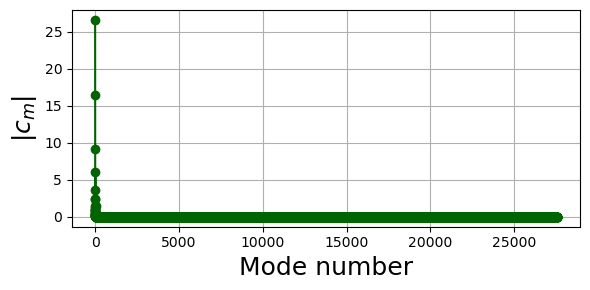

In [14]:
fig,ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(np.abs(c), color='darkgreen', marker='o')
ax.grid()
ax.set_xlabel("Mode number", fontsize=18)
ax.set_ylabel(r"$|c_m|$", fontsize=18)
plt.tight_layout()
fig.savefig("mode_projection_values.png", dpi=300)

In [15]:
E_reconstructed = (eig_vectors @ c)
E_reconstructed = E_reconstructed

In [16]:
E_reshaped = E_reconstructed.reshape(166,166)

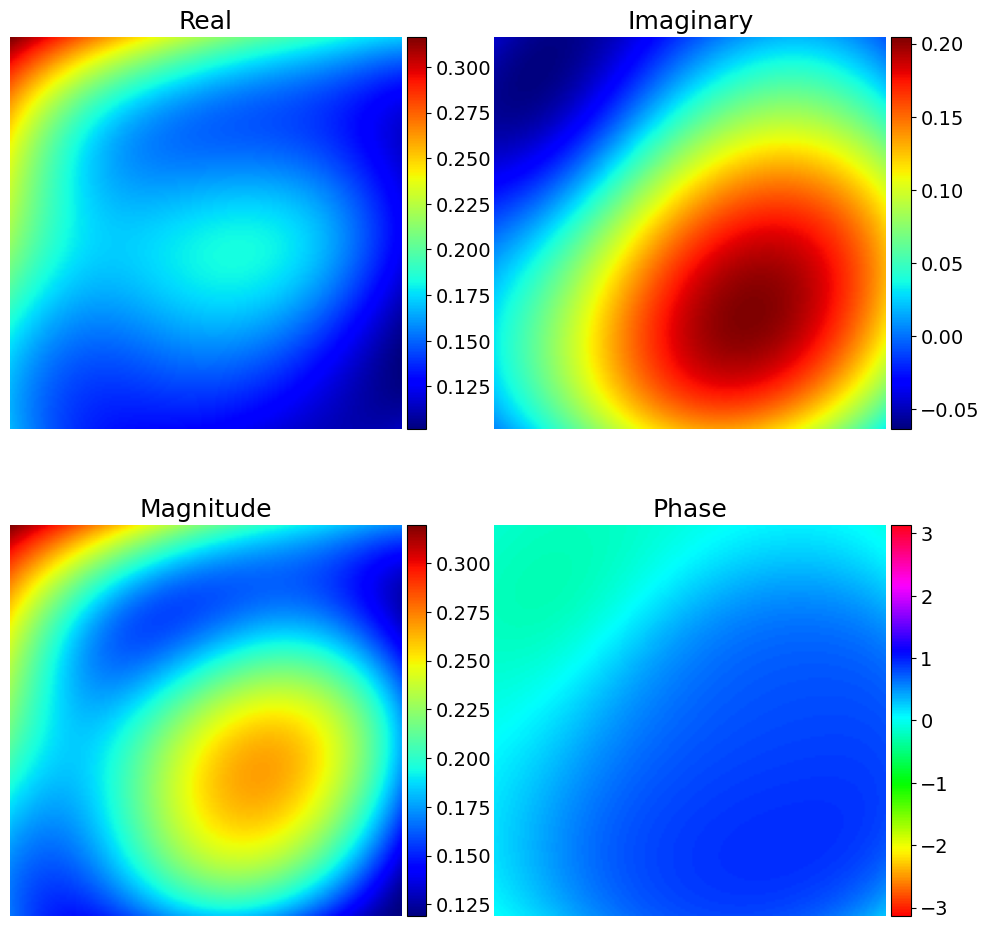

In [17]:
fig,ax = plt.subplots(2,2, figsize=(10,10))

im1 = ax[0][0].imshow(E_reshaped.real, cmap='jet', vmin=min_real, vmax=max_real)
divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

im1 = ax[0][1].imshow(E_reshaped.imag, cmap='jet', vmin=min_imag, vmax=max_imag)
divider = make_axes_locatable(ax[0][1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

im1 = ax[1][0].imshow(np.abs(E_reshaped), cmap='jet', vmin=min_abs, vmax=max_abs)
divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

im1 = ax[1][1].imshow(np.angle(E_reshaped), cmap='hsv', vmin=-np.pi, vmax=np.pi)
divider = make_axes_locatable(ax[1][1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

ax[0][0].set_title("Real", fontsize=18)
ax[0][1].set_title("Imaginary", fontsize=18)
ax[1][0].set_title("Magnitude", fontsize=18)
ax[1][1].set_title("Phase", fontsize=18)


for a in ax.flatten():
    a.axis('off')
plt.tight_layout()
fig.savefig("reconstructed_00001.png", dpi=300)

In [18]:
difference = reshaped_field - E_reshaped
diff_mag = np.abs(reshaped_field) - np.abs(E_reshaped)
diff_phase = np.angle(reshaped_field) - np.angle(E_reshaped)
diff_phase = (diff_phase + np.pi) % (2 * np.pi) - np.pi
max_real_diff = np.max(np.abs(difference.real))
max_imag_diff = np.max(np.abs(difference.imag))
max_abs_diff = np.max(np.abs(diff_mag))

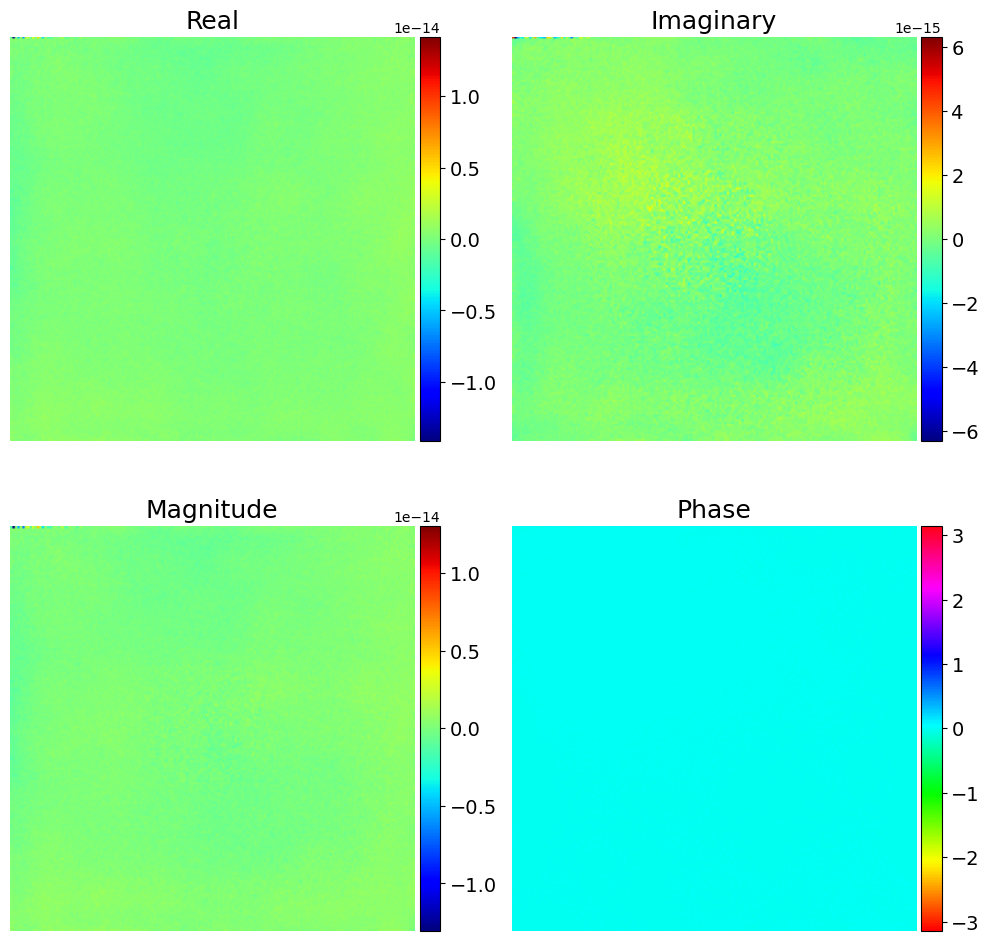

In [19]:
fig,ax = plt.subplots(2,2, figsize=(10,10))

im1 = ax[0][0].imshow(difference.real, cmap='jet', vmin=-max_real_diff, vmax=max_real_diff)
divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

im1 = ax[0][1].imshow(difference.imag, cmap='jet', vmin=-max_imag_diff, vmax=max_imag_diff)
divider = make_axes_locatable(ax[0][1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

im1 = ax[1][0].imshow(diff_mag, cmap='jet', vmin=-max_abs_diff, vmax=max_abs_diff)
divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

im1 = ax[1][1].imshow(diff_phase, cmap='hsv', vmin=-np.pi, vmax=np.pi)
divider = make_axes_locatable(ax[1][1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)

ax[0][0].set_title("Real", fontsize=18)
ax[0][1].set_title("Imaginary", fontsize=18)
ax[1][0].set_title("Magnitude", fontsize=18)
ax[1][1].set_title("Phase", fontsize=18)


for a in ax.flatten():
    a.axis('off')
plt.tight_layout()
fig.savefig("difference_00001.png", dpi=300)